<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_14_%EC%82%AC%EB%9E%8C_(%EA%B0%95%EC%A4%80%2C_%EC%88%98%ED%99%98)_%EC%96%BC%EA%B5%B4_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 강준, 수환님 얼굴을 분류하는 이진분류 모델을 만들어보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image # PIL: 이미지를 불러오게끔 해주는 라이브러리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


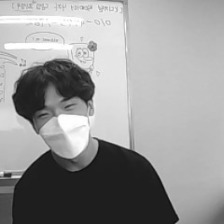

In [6]:
# 이미지를 가져와서 흑백으로 전환
# convert -> L: 흑백, RGB: 컬러
img = Image.open("/content/drive/MyDrive/Colab Notebooks/빅데이터4차(딥러닝)/data/Class 1-samples/1.jpg").convert('L')
img

In [8]:
# 이미지 데이터를 numpy 배열로 변환
# 기계가 인식할 수 있도록 이미지 데이터를 숫자 데이터로 변환시켜줘야 하기 때문
# -> 가로 (행), 세로 (열) 픽셀 수 만큼 변경을 시켜줌
img_array = np.array(img)

# 손글씨, 패션데이터는 kerasㄴ에서 제공하는 학습용 데이터이기 때문에 사전에 수치형태로 변환되어져 있었음

In [9]:
img_array.shape

(224, 224)

In [10]:
img_array

array([[155, 156, 158, ..., 157, 157, 157],
       [192, 192, 193, ..., 157, 157, 158],
       [193, 193, 193, ..., 158, 158, 158],
       ...,
       [ 75,  76,  77, ...,  96,  95,  94],
       [ 76,  76,  76, ...,  97,  97,  96],
       [ 76,  76,  76, ...,  98,  98,  97]], dtype=uint8)

In [ ]:
# 데이터 셋 구성 (인물별 200장씩)

In [17]:
# 반복문 실행시 어느정도 실행되고 있는지 %로 알려주는 라이브러리
from tqdm import tqdm

In [18]:
class1_list = [] # 강준이형 데이터가 저장될 자리
class2_list = [] # 수환님 데이터가 저장될 자리

for i in tqdm(range(0,200,1)):
# 1. 강준이형 데이터 작업
# 경로와 이름에 맞게 이미지를 가져와서 흑백으로 변환한 후에 img1이라는 변수에 담아줌
  img1 = Image.open("/content/drive/MyDrive/Colab Notebooks/빅데이터4차(딥러닝)/data/Class 1-samples/"+str(i)+".jpg").convert('L')
  # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
  img_array1 = np.array(img1)
  # numpy 배열로 변환된 데이터를 빈 리스트에 하나씩 추가해주기
  class1_list.append(img_array1)

  # 2. 수환님 데이터 작업
  img2 = Image.open("/content/drive/MyDrive/Colab Notebooks/빅데이터4차(딥러닝)/data/Class 2-samples/"+str(i)+".jpg").convert('L')
  # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
  img_array2 = np.array(img2)
  # numpy 배열로 변환된 데이터를 빈 리스트에 하나씩 추가해주기
  class2_list.append(img_array2)


100%|██████████| 200/200 [00:19<00:00, 10.21it/s]
